## Przeanalizowanie zadania

Mam zamiar wytrenowac model ktory bedzie poprawnie klasyfikował ręcznie pisane cyfry od 0 do 9 korzystajac ze zbioru MNIST
Wykorzystam do tego siec konwolucyjna która polega na przesuwaniu filtra (jadra konwolucyjnego ) po obrazie i obliczaniu iloczynu skalarnego miedzy filtrem a fragmentami obrazu 

In [3]:
import numpy as np
np.random.seed(0)

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

###  Wczytywanie danych

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print((X_train.shape), (X_test.shape))

(60000, 28, 28) (10000, 28, 28)


Zbiór danych MINST zawiera 60 000 próbek obrazów (28x28 pikseli) z cyframi recznie pisanymi od 0 do 9 oraz zestaw testowy o wielkosci 10 000 obrazów.

Został on podzielony autoatycznie na zestaw treningowy i testowy

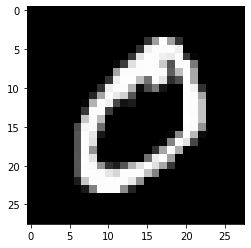

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap = 'gray')
plt.show()


W zbiorze danych MNIST kazdy obraz to macierz o wymiarach 28x28 w której wartosci odpowiadaja odcieniom szarości pikseli obrazu. 

#### Normalizacja danych 
Skaluje wartości z przedziału [0,255] do [0,1]

Zmiennnoprzecinkowe liczby pozwalaja na reprezentowanie wartości z wiekszą dokładnoscia, szczególnie w przypadku małych liczb

In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

num_classes = 10
img_rows, img_cols = 28,28

Konwersja etykiet na wektory one-hot dla zmiennej docelowej



In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### Budowanie Modelu  sieci konwolucyjnych 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

model = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[img_rows,img_cols,1]),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), 
        
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    #spłaszczenie danych i dodanie warstwy w pełni połaczonych
    # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
    Flatten(), 
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])


- Sequential- Tworzy model jako sekwencje warstw
- Conv2d jest to warstwa konwolucyjna która ma 32 filtry o rozmiarze 3x3 i funkcje aktywacji ReLU. Parametr input_shape definiuje kształt wejscia (wysokosc, szerokosc, kanały )
- Max Pooling2d(pool_size=(2,2)) Zmniejsza rozmiar macierzy, wybierajac maksymalne wartosci z okienek 2x2 co redukuje wymiar i szum 
- Dropout(0,25) Losowo zeruej 25% jednostek co zapobiega przeuczeniu modelu 
- Flatten() Spłaszcza dane, przekształcajac macierz z wieloma wymiarami w wektor, który moze byc przetworzony przez warstwy Danse
- Dense(1024, activation='relu') warstwa wpełni połaczona z 1024 jednostkami uzywa funkcji relu 
-

### Kompilacja Modelu

Okresle teraz jak model bedzie trenowany.
Obejmuje to wybór optymalizatora, funkcji straty i metryk

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

- Optymalizator (Adam)- okresla, jak model bedzie aktualizował swoje wagi w trakcie uczeniu. Adam łaczy zalety optymalizatorów RMSprop i SGD
- Funkcja Straty (categorical_crossentropy)- Mierzy róznice miedzy przewidywaniami modelu a rzeczywitymi etykietami 
- metryki ( accuracy) uzywane do monitorowania skutecznosci  modelu , dokładnosci 

### Trenowanie Modelu 

In [10]:
model.fit(X_train, y_train,
          batch_size=128, epochs=20, verbose=2,

Epoch 1/20


ValueError: in user code:

    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)


### Ocena Modelu
Sprawdze teraz jak dobrze model radzi sobie z danymi testowymi

In [ ]:
score = model.evaluate(x_test,y_test)
print('Test loss: ', score[0])
print('Test accuracy: ',score[1])

- Test loss ( score[0]) strata obliczona na danych testowych czyli jak dobrze model przewiduje 
- Test accuracy (score[1]) Dokładnosc modelu na danych testowych czyli procent poprawnych klasyfikacji